# The Problem
### Distributed Denial of Service (DDoS) attack vectors are one of the most powerful methods of corrupting various computer systems and applications. They can exhaust the computational resoures which can lead to service's disruption or huge financial losses by utilizing too much energy or purchased resources on some cloud platform

### For businesses that rely on cloud technologies it is crucial to have availability of their services since it can be one of the value propositions that this business has. Therefore, I would like to create a machile learning pipeline that can be used in company's Intrusion Detection System (IDS) to indicate DDoS attacks and help to mitigate them

# Machine Learning Task
### Develop a machine learning model to classify incoming network packets and identify if packets are malicious or normal

# Dataset overview
### To train the model, the CIC-IDS2017 dataset was used. The dataset of Canadian Institute of Cybersecurity contains modern attacks stored in a real-world format (PCAP). The collection of captured packets 

## $$\{(x_i,y_i)\}^N_{i=1}$$
### - $N(size\;of\;the\;collection) = 225745$ corresponds to the number of rows in the dataset
### - $x_i$ is D-dimensional feature vector (columns), where $D=78\;$(excluding the target label)
### - $y_i$ is a target label for every $x_i$

#

# Learning Algorithm Selection
### - Explainability: the model will be presented to technical audience and doesn't necessairly require explainability
### - In-memory vs out-of-memory: in the scope of this assignment, the entire dataset can be loaded into computer's RAM. Hovewer, it will be assumed that the model has to be updated incrementally to simulate the real-world scenario of using intrusion detection systems
### - The number of features and examples is more than 100k
### - The feature vector $x_i$ is mostly numerical
### - Is the data linear???
### - The training speed of the model is not a constraint
### - Prediction speed should be relatively fast

# Possible classification ML models:
### - Support Vector Machine (SVM)
### - KNeighbours Classifier
### - Gradient Boosting

# The machine learning pipeline

### Dependencies

In [4]:
# dataframes and plotting
import pandas as pd
import matplotlib.pyplot as plt

# math
import numpy as np

# data cleaning
from sklearn.impute import SimpleImputer

# creating sets
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Data Exploration

### Data Overview

In [53]:
ddos = pd.read_csv("./DDoS_dataset.csv")

pd.set_option("display.max_info_rows", 10)

In [2]:
#ddos.info()

# Data Preprocessing

### Data Cleaning

In [54]:
# remove unnecessary spaces from dataset's column names
ddos_mapper = lambda x : x.strip()
ddos = ddos.rename(mapper=ddos_mapper, axis=1)

ddos = ddos.fillna(np.nan)
ddos = ddos.replace(np.inf, np.nan)

pd.set_option("display.max_rows", None)
ddos.isna().any()

Destination Port               False
Flow Duration                  False
Total Fwd Packets              False
Total Backward Packets         False
Total Length of Fwd Packets    False
Total Length of Bwd Packets    False
Fwd Packet Length Max          False
Fwd Packet Length Min          False
Fwd Packet Length Mean         False
Fwd Packet Length Std          False
Bwd Packet Length Max          False
Bwd Packet Length Min          False
Bwd Packet Length Mean         False
Bwd Packet Length Std          False
Flow Bytes/s                    True
Flow Packets/s                  True
Flow IAT Mean                  False
Flow IAT Std                   False
Flow IAT Max                   False
Flow IAT Min                   False
Fwd IAT Total                  False
Fwd IAT Mean                   False
Fwd IAT Std                    False
Fwd IAT Max                    False
Fwd IAT Min                    False
Bwd IAT Total                  False
Bwd IAT Mean                   False
B

### Creating training, validation, and testing sets

In [55]:
ddos_training, ddos_other = train_test_split(ddos, train_size=0.8)
ddos_validation, ddos_testing = train_test_split(ddos_other, test_size=0.5)

# training x and y vectors
ddos_training_X = ddos_training.drop(columns="Label")
ddos_training_Y = ddos_training["Label"]

### Data Imputation

In [61]:
nan_imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
ddos_training_X = pd.DataFrame(nan_imputer.fit_transform(ddos_training_X), columns=ddos_training_X.columns)

ddos_training_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180596 entries, 0 to 180595
Data columns (total 78 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             float64
 1   Flow Duration                float64
 2   Total Fwd Packets            float64
 3   Total Backward Packets       float64
 4   Total Length of Fwd Packets  float64
 5   Total Length of Bwd Packets  float64
 6   Fwd Packet Length Max        float64
 7   Fwd Packet Length Min        float64
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        float64
 11  Bwd Packet Length Min        float64
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 float64
 19  Fl

<BarContainer object of 2 artists>

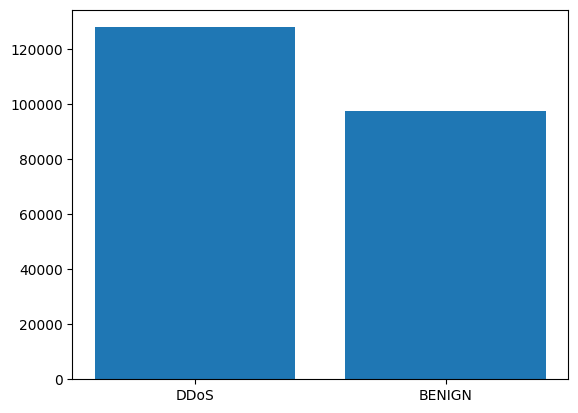

In [62]:
label_counts = ddos["Label"].value_counts()
plt.bar(label_counts.index, label_counts.values)